In [15]:
import os
csv_path = os.path.join('..','datasets','housing','housing.csv')

### 读取csv数据

In [49]:
housing = pd.read_csv(csv_path)

### 头部数据展示

In [50]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 数据具体描述

In [51]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 某seq的统计值

In [52]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### dataframe的数值型数据列的总结

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 可视化直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a255b1080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a209af358>]], dtype=object)

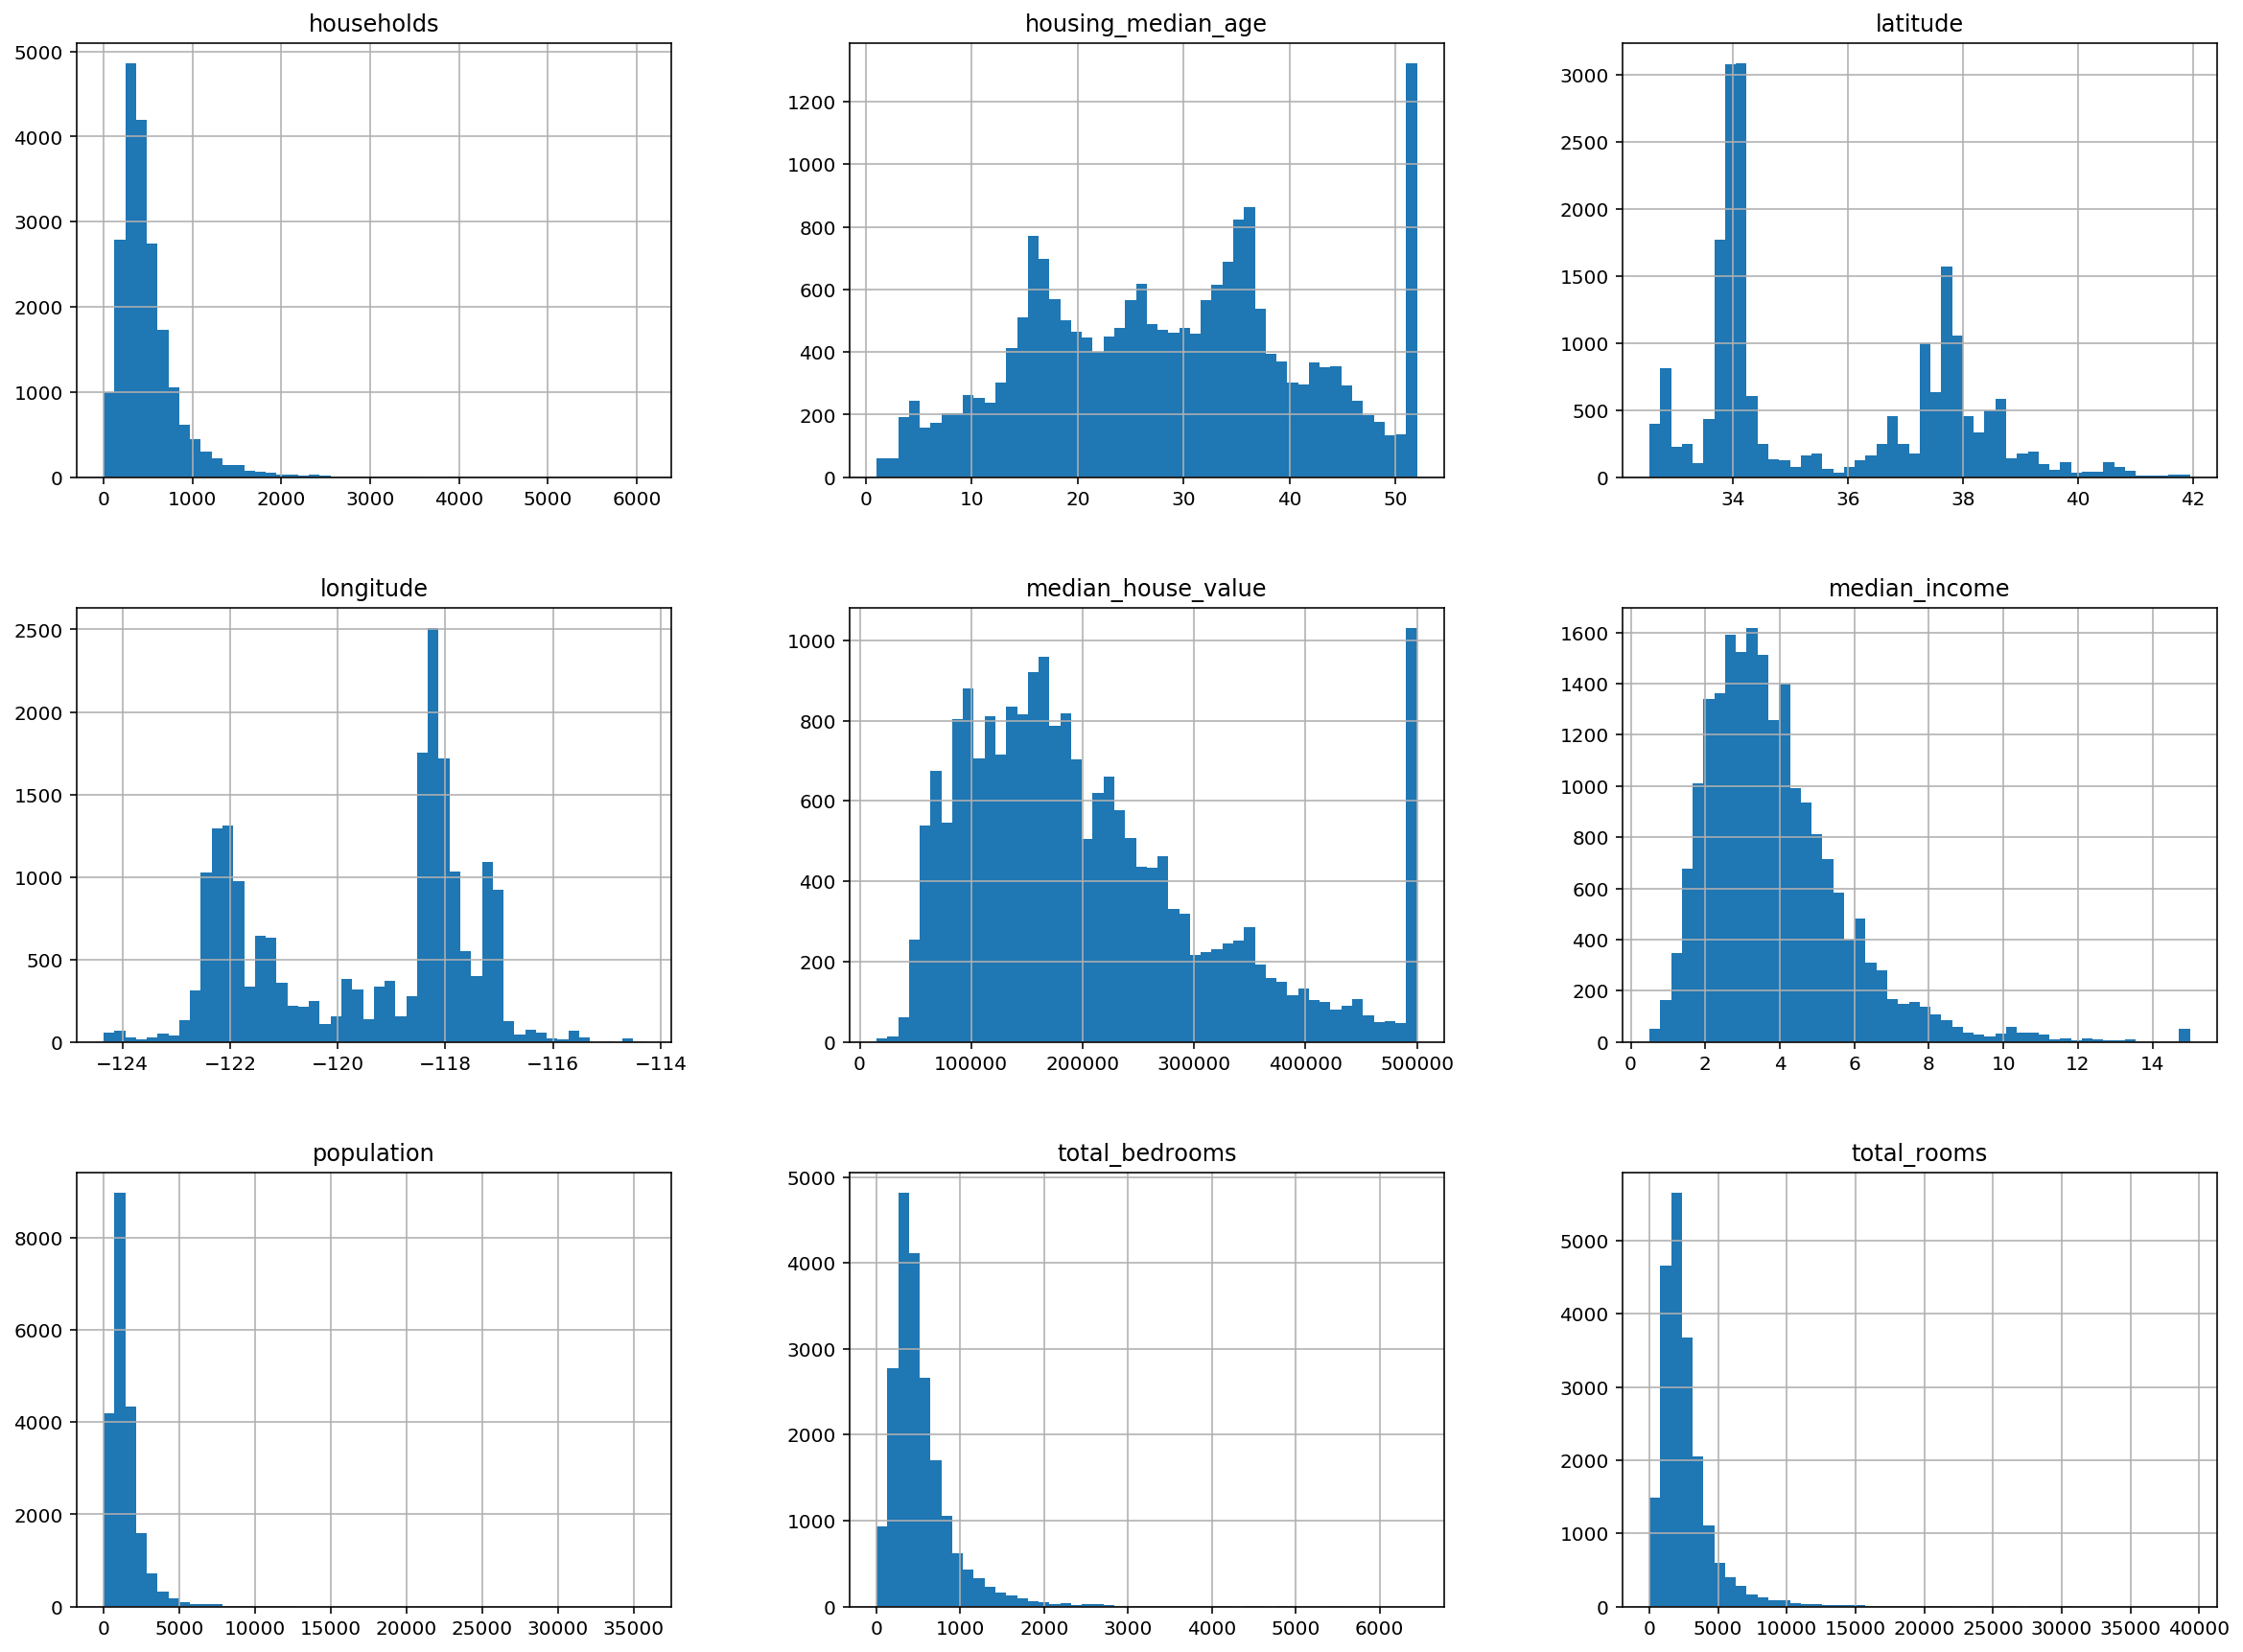

In [54]:
#bins:  这个参数指定bin的个数,也就是总共有几条条状图
housing.hist(bins=50,figsize=(20,15))

In [57]:
def split_train_test(data,test_ratio):
    #np.random.shuffle.random.permutation前一个打乱原始顺序，后一个生成新的打乱顺序对象
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [58]:
train_set,test_set = split_train_test(housing,0.2)
print("train=",len(train_set),",test=",len(test_set))

train= 16512 ,test= 4128


In [59]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(hoursing,test_size=0.2,random_state=42)
print("train=",len(train_set),",test=",len(test_set))
print("train1=",len(train_set1),",test1=",len(test_set1))

train= 16512 ,test= 4128
train1= 16512 ,test1= 4128


### 对序列做处理

In [60]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Series.where(cond, other=nan, inplace=False, axis=None, level=None, errors=‘raise’, try_cast=False, raise_on_error=None)
#如果 cond 为真，保持原来的值，否则替换为other， inplace为真标识在原数据上操作，为False标识在原数据的copy上操作。
#other must be the same shape as self: other的形状必须与self相同。
housing["income_cat"].where(housing["income_cat"] < 5,5.0,inplace=True )
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


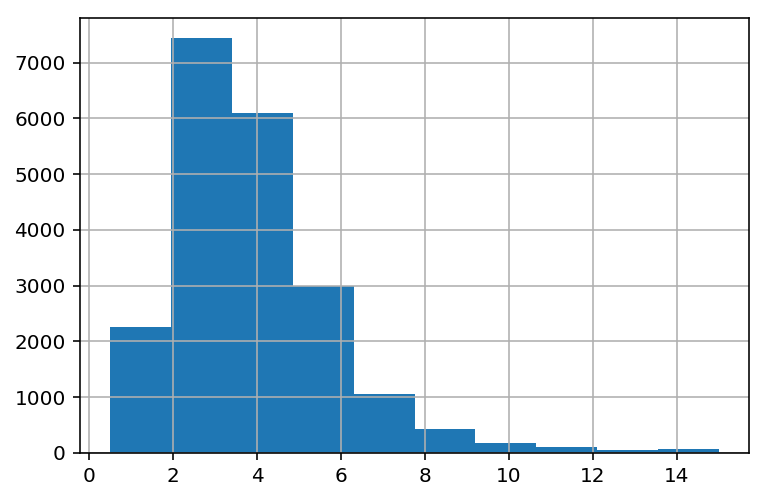

In [61]:
# 某个单列的统计直方图
housing["median_income"].hist()

### 分层抽样

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


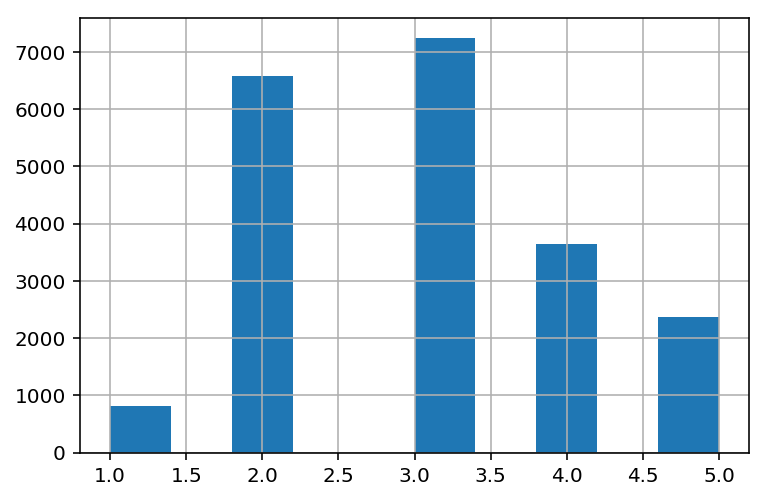

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
#切分器
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(hoursing,hoursing["income_cat"]):
    strat_train_set = hoursing.loc[train_index]
    strat_test_set = hoursing.loc[test_index]
print(housing["income_cat"].value_counts() / len(housing))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
housing["income_cat"].hist()

In [30]:
for s in (strat_train_set,strat_test_set):
    #默认删除行 axis参数用于表示删除列
    s.drop(["income_cat"],axis=1,inplace=True)

### 拷贝数据

In [31]:
housing = strat_train_set.copy()

### 根据2个属性作散点图

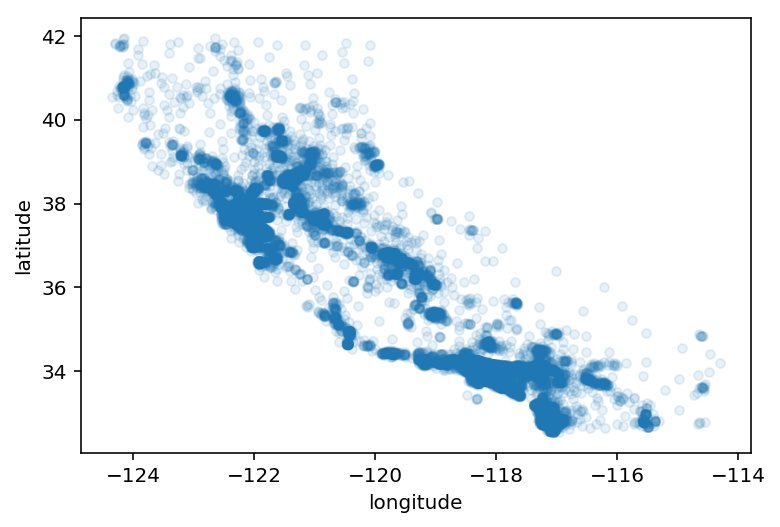

In [63]:
#根据某2列话散点图,alpha密度
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

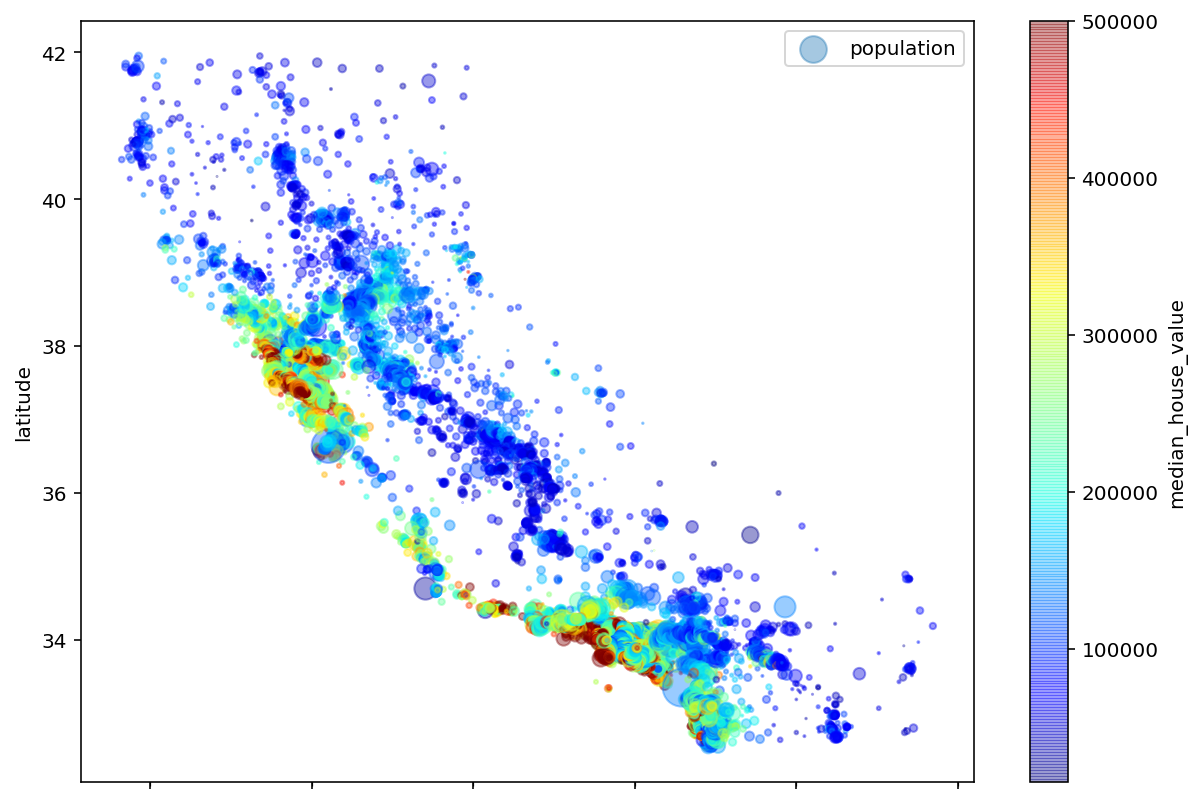

In [64]:
## s:在是画散点图的时候，表示点的大小
## c:在是画散点图的时候，表示颜色
## cmap:设置颜色渐变
hoursing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=hoursing["population"]/100,label="population", figsize=(10,7),
              c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### 相关度

In [66]:
#当数据不大时，可以通过它来查看样本所有特征之间的标准相关系数(pearson相似度)，且它只能表示线性相关，对于非线性相关无能为力
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
print(corr_matrix["median_income"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64
median_income         1.000000
income_cat            0.902750
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64


### 散点图矩阵分析

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a9c45f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a27630588>]], dtype=object)

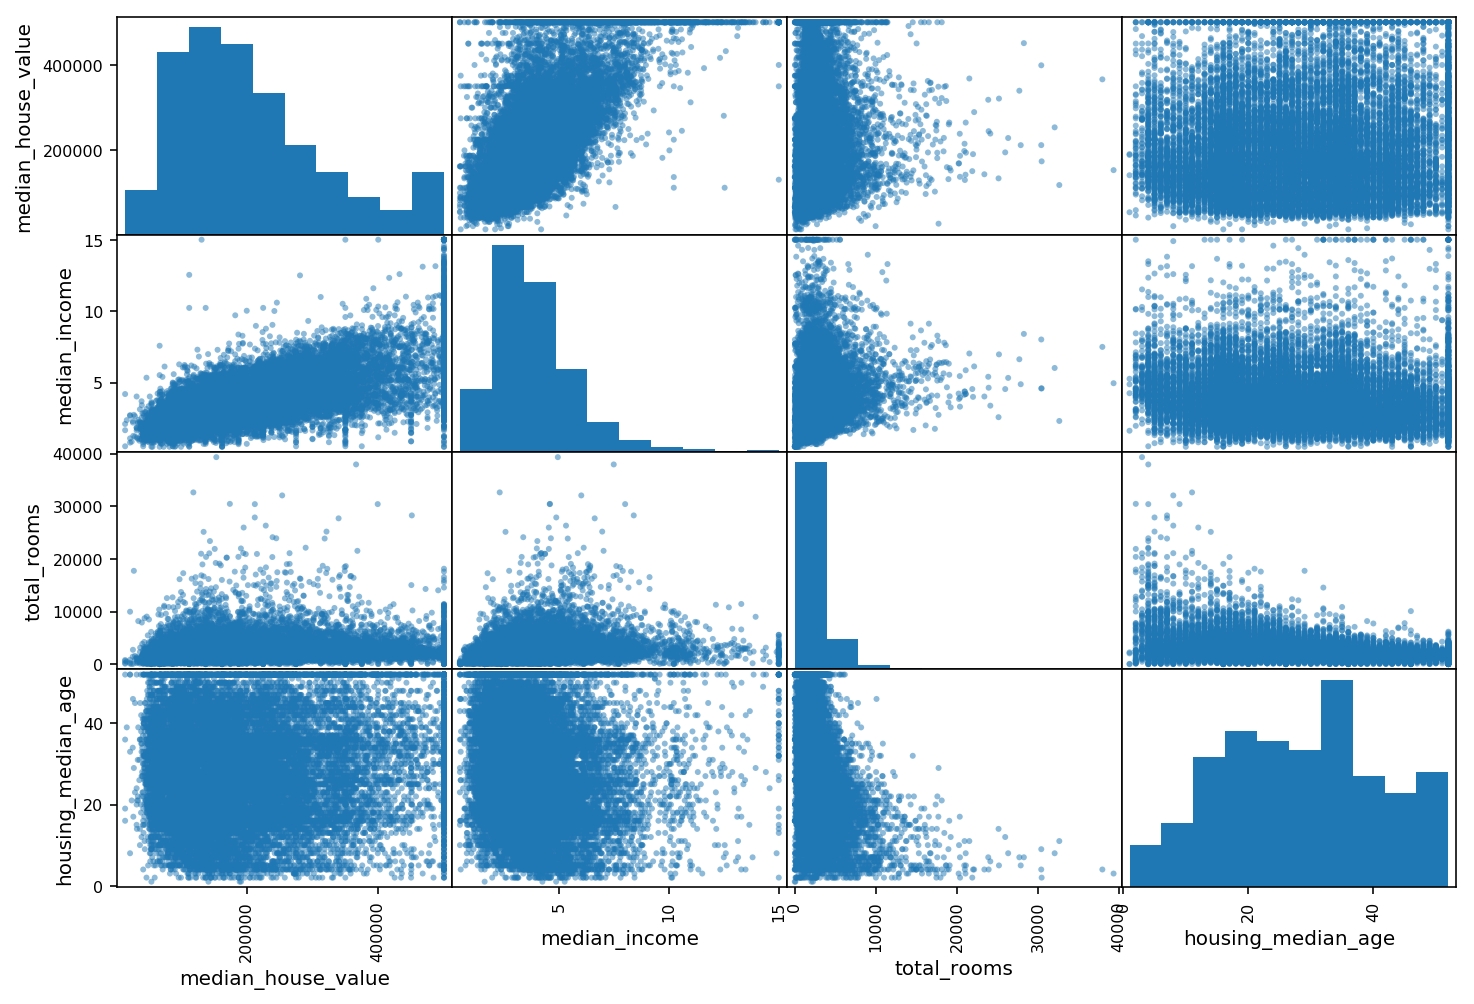

In [67]:
#通过图表示的方法看相关性，这里需要对列表进行限制否则多个特征之间22图会成倍出现
#对于自己和自己直接通过直方图限制，由于对角线散列图并没有意义
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(hoursing[attributes],figsize=(12,8))

### 特征组合

In [39]:
# 有些特征并不好用，因此需要结合使用
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"] = housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_room               -0.259984
Name: median_house_value, dtype: float64

### 取空值行

In [68]:
housing[housing.isnull().values==True].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3.0
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY,4.0
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND,4.0
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,3.0
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND,3.0
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY,5.0


In [69]:
#数据准备
housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

### 数据清理

In [70]:
#处理空值：1.去掉对应区域；2.去掉整个属性；3.设置这个值为某些特殊值(如:0、均值、中位数等)
housing.dropna(subset=["total_bedrooms"]) #option1
housing.drop("total_bedrooms",axis=1) #option2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) #option3 一般需要保存起来用在测试和预测时为空的填充
housing["total_bedrooms"].head(10)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
Name: total_bedrooms, dtype: float64

In [71]:
# sklearn提供的方便处理缺失值的类
from sklearn.preprocessing import  Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis=1)
#简单计算每个属性的中位数
imputer.fit(housing_num)
#每个属性的中位数
print(imputer.statistics_)
print(housing_num.median().values)
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409     3.    ]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409     3.    ]


/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [72]:
housing_tr[housing_tr.isnull().values==True].head(10).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


### sklearn设计规范
#### 1.一致性
##### 1.1评估器:所有对象共享一致性的简单接口。所有基于数据集可以评估一些参数的对象都叫做估计器，使用fit(dataset)，并且它只包使用一个数据集作为参数（或是为监督方法使用2个；第二个是标记集合），用于指导评估过程的参数叫做超参（在imputer中为strategy），它必须被作为一个市里变量被设置（一般是通过构造函数）
##### 1.2.转换:一些被称为转换器的评估器也可以用于转换数据集（如imputer）。它们在数据集上使用transform(dataset)方法,返回转换后的数据集。转换一般依赖于学习参数。所有的转换器有一个通用的方式fit_transform方法，它等同于使用fit然后使用transform（有时候它优化的更好比分开执行它们）
##### 1.3.预测器:一些有能力预测数据集的评估器叫做预测器。（如:LinearRegression模型），它有一个predict方法，用来根据数据集中新的实例预测对应的值。并且它还有一个score方法用来评估在给定测试集上的质量。

#### 2.检测
##### 2.1.所有评估器的超参都可以通过公共的实例变量直接获取（如：imputer.strategy)，并且所有的评估器的被学习参数也可以通过一个后缀_同样获取(如：imputer.statistics_)

#### 3.防扩散
##### 3.1.数据集由Numpy arrays或是SciPy sparse matrics表示，超参都是有规律的Python字符串或是数字表示

#### 4.组成
##### 4.1.现有的积木都是尽可能的被重用。如可以很容易的创建一个Pipeline估计器从任意一串转换器到最终的估计器。

#### 5.合理的违约
##### 5.1.sklearn提供了大部分合理的默认值，可以很容易且快速的创建一个基础工作系统

In [73]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN,1.0


### 处理文本和类别属性

In [78]:
# 分类属性编码
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)
# 上述问题：机器学习一般假定2个相近的值更相近，因此这样的离散属性在这里可能并不好用

[0 0 4 ..., 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [81]:
# OneHotEncoder只能用于将整数类别值变成one-hot向量
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#返回的是SciPy的稀疏矩阵,在上千位的时候可以很好的节省空间
housing_cat_1hot
#housing_cat_1hot.toarray() #转成密集型向量

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
#结合上面2个的方法
from sklearn.preprocessing import LabelBinarizer
# 默认用密集向量，可以通过参数sparse_output=True变成稀疏向量
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### 自定义转换器

In [88]:
# BaseEstimator是评估器的基类，TransformerMixin默认提供了fit_transform的组合
from sklearn.base import BaseEstimator,TransformerMixin

room_ix,bedroom_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    # 一定要默认构造参数
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,room_ix] / X[:,household_ix]
        population_per_household  =  X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix]/X[:,room_ix]
            #np.c_是将多个矩阵按左右合并，np.r_是将列表按上下合并
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 2.0, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 5.0, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 2.0, 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 3.0, 6.34640522875817, 2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 3.0, 5.50561797752809, 3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 3.0, 4.843505477308295,
        1.9859154929577465]], dtype=object)

### 特征缩放

In [ ]:
#此步骤非必须，但是很重要，一般有min-max缩放和standardization
#1.min-max:略
#2.标准化